In [387]:
#One line at a time

In [388]:
import pandas as pd 
import numpy as np

In [389]:
first_dataset = pd.read_csv("static\IPL_Ball_by_Ball_2008_2022.csv")
second_dataset = pd.read_csv("static\IPL_Matches_2008_2022.csv")

first_dataset.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [390]:
second_dataset.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [391]:
first_dataset.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [392]:
total_runs = first_dataset.groupby(['ID','innings']).sum()['total_run'].add(1).reset_index()

In [393]:
total_runs

,ID,innings,total_run
0,335982,1,223
1,335982,2,83
2,335983,1,241
3,335983,2,208
4,335984,1,130
...,...,...,...
1923,1312198,2,194
1924,1312199,1,158
1925,1312199,2,162
1926,1312200,1,131


In [394]:
total_runs = total_runs[total_runs['innings']==1]

In [395]:
match_df = second_dataset.merge(total_runs[['ID','total_run']],left_on='ID',right_on='ID')

In [396]:
match_df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,total_run
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,131
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,158
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,208
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,189
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,...,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan,111
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,...,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,166
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,...,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar,130
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,...,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,241


In [397]:
match_df['Team1'].value_counts()

Royal Challengers Bangalore    126
Mumbai Indians                 112
Chennai Super Kings            111
Kolkata Knight Riders          105
Kings XI Punjab                 92
Rajasthan Royals                89
Delhi Daredevils                85
Sunrisers Hyderabad             69
Deccan Chargers                 39
Delhi Capitals                  29
Pune Warriors                   23
Punjab Kings                    18
Gujarat Lions                   16
Lucknow Super Giants             8
Gujarat Titans                   7
Kochi Tuskers Kerala             7
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Name: Team1, dtype: int64

In [398]:
match_df['Team1'] = match_df['Team1'].replace('Delhi Daredevils','Delhi Capitals')
match_df['Team2'] = match_df['Team2'].replace('Delhi Daredevils','Delhi Capitals')

match_df['Team1'] = match_df['Team1'].replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['Team2'] = match_df['Team2'].replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['Team1'] = match_df['Team1'].replace('Kings XI Punjab','Punjab Kings')
match_df['Team2'] = match_df['Team2'].replace('Kings XI Punjab','Punjab Kings')

In [399]:
match_df['Team1'].value_counts()

Royal Challengers Bangalore    126
Delhi Capitals                 114
Mumbai Indians                 112
Chennai Super Kings            111
Punjab Kings                   110
Sunrisers Hyderabad            108
Kolkata Knight Riders          105
Rajasthan Royals                89
Pune Warriors                   23
Gujarat Lions                   16
Lucknow Super Giants             8
Rising Pune Supergiants          7
Gujarat Titans                   7
Kochi Tuskers Kerala             7
Rising Pune Supergiant           7
Name: Team1, dtype: int64

In [400]:
teams = ['Kolkata Knight Riders', 
         'Chennai Super Kings',
         'Punjab Kings', 
         'Rajasthan Royals',
         'Mumbai Indians',
         'Delhi Capitals',
         'Royal Challengers Bangalore',
         'Sunrisers Hyderabad',
         'Lucknow Super Giants',
         'Gujarat Titans'
         ]

In [401]:
match_df = match_df[match_df['Team1'].isin(teams)]
match_df = match_df[match_df['Team2'].isin(teams)]

In [402]:
match_df['Team1'].value_counts()

Royal Challengers Bangalore    118
Chennai Super Kings            107
Delhi Capitals                 106
Punjab Kings                   103
Mumbai Indians                 102
Sunrisers Hyderabad            101
Kolkata Knight Riders           98
Rajasthan Royals                85
Lucknow Super Giants             8
Gujarat Titans                   7
Name: Team1, dtype: int64

In [403]:
match_df.shape

(835, 21)

In [404]:
match_df = match_df[['ID','City','WinningTeam','total_run', 'Team1', 'Team2']]

In [405]:
match_df.shape

(835, 6)

In [406]:
second_innings = match_df.merge(first_dataset,on='ID')
second_innings

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,extra_type,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,1,0,1,YBK Jaiswal,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,1,0,2,YBK Jaiswal,...,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,1,0,3,JC Buttler,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,1,0,4,YBK Jaiswal,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,1,0,5,YBK Jaiswal,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198930,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
198931,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
198932,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
198933,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [407]:
second_innings = second_innings[second_innings['innings']==2]
second_innings.shape

(95974, 22)

In [408]:
second_innings

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,extra_type,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
120,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
121,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
122,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans
123,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
124,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198930,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
198931,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
198932,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
198933,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [409]:
second_innings['Team1'] = second_innings['Team1'].replace('Delhi Daredevils','Delhi Capitals')
second_innings['Team2'] = second_innings['Team2'].replace('Delhi Daredevils','Delhi Capitals')

second_innings['Team1'] = second_innings['Team1'].replace('Deccan Chargers','Sunrisers Hyderabad')
second_innings['Team2'] = second_innings['Team2'].replace('Deccan Chargers','Sunrisers Hyderabad')

second_innings['Team1'] = second_innings['Team1'].replace('Kings XI Punjab','Punjab Kings')
second_innings['Team2'] = second_innings['Team2'].replace('Kings XI Punjab','Punjab Kings')

C:\Users\sagni\AppData\Local\Temp\ipykernel_13380\340332489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_innings['Team1'] = second_innings['Team1'].replace('Delhi Daredevils','Delhi Capitals')
C:\Users\sagni\AppData\Local\Temp\ipykernel_13380\340332489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_innings['Team2'] = second_innings['Team2'].replace('Delhi Daredevils','Delhi Capitals')
C:\Users\sagni\AppData\Local\Temp\ipykernel_13380\340332489.py:4: SettingWithCopyWarning: 
A value

In [410]:
second_innings['Team1'].value_counts()

Royal Challengers Bangalore    13277
Chennai Super Kings            12646
Delhi Capitals                 12047
Mumbai Indians                 11898
Punjab Kings                   11812
Sunrisers Hyderabad            11708
Kolkata Knight Riders          11083
Rajasthan Royals                9745
Lucknow Super Giants             968
Gujarat Titans                   790
Name: Team1, dtype: int64

In [411]:
second_innings.columns

Index(['ID', 'City', 'WinningTeam', 'total_run_x', 'Team1', 'Team2', 'innings',
       'overs', 'ballnumber', 'batter', 'bowler', 'non-striker', 'extra_type',
       'batsman_run', 'extras_run', 'total_run_y', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam'],
      dtype='object')

In [412]:
second_innings.shape

(95974, 22)

In [413]:
# Function to determine the bowling team
def determine_bowling_team(row):
    if row['BattingTeam'] == row['Team1']:
        return row['Team2']
    else:
        return row['Team1']

# Create the new 'BowlingTeam' column
second_innings['BowlingTeam'] = second_innings.apply(determine_bowling_team, axis=1)


C:\Users\sagni\AppData\Local\Temp\ipykernel_13380\1658040854.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_innings['BowlingTeam'] = second_innings.apply(determine_bowling_team, axis=1)


In [414]:
second_innings.tail(103)

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam
198708,335983,Chandigarh,Chennai Super Kings,241,Punjab Kings,Chennai Super Kings,2,19,5,SM Katich,...,1,0,1,0,0,NaN,NaN,NaN,Kings XI Punjab,Punjab Kings
198709,335983,Chandigarh,Chennai Super Kings,241,Punjab Kings,Chennai Super Kings,2,19,6,IK Pathan,...,0,0,0,0,0,NaN,NaN,NaN,Kings XI Punjab,Punjab Kings
198834,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,0,1,R Dravid,...,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
198835,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,0,2,W Jaffer,...,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
198836,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,0,3,W Jaffer,...,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198930,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
198931,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
198932,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
198933,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders


In [415]:
second_innings['BattingTeam'] = second_innings['BattingTeam'].replace('Delhi Daredevils','Delhi Capitals')
second_innings['BowlingTeam'] = second_innings['BowlingTeam'].replace('Delhi Daredevils','Delhi Capitals')

second_innings['BattingTeam'] = second_innings['BattingTeam'].replace('Deccan Chargers','Sunrisers Hyderabad')
second_innings['BowlingTeam'] = second_innings['BowlingTeam'].replace('Deccan Chargers','Sunrisers Hyderabad')

second_innings['BattingTeam'] = second_innings['BattingTeam'].replace('Kings XI Punjab','Punjab Kings')
second_innings['BowlingTeam'] = second_innings['BowlingTeam'].replace('Kings XI Punjab','Punjab Kings')

C:\Users\sagni\AppData\Local\Temp\ipykernel_13380\1361729818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_innings['BattingTeam'] = second_innings['BattingTeam'].replace('Delhi Daredevils','Delhi Capitals')
C:\Users\sagni\AppData\Local\Temp\ipykernel_13380\1361729818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_innings['BowlingTeam'] = second_innings['BowlingTeam'].replace('Delhi Daredevils','Delhi Capitals')
C:\Users\sagni\AppData\Local\Temp\ipykernel_13380\1361729818.py:4: Setti

In [416]:
second_innings

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam
120,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals
121,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals
122,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals
123,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals
124,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198930,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
198931,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
198932,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
198933,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders


In [417]:
second_innings['BowlingTeam'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians'], dtype=object)

In [418]:
second_innings['current_Score'] = second_innings.groupby('ID').cumsum()['total_run_y']
second_innings

C:\Users\sagni\AppData\Local\Temp\ipykernel_13380\3076402150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_innings['current_Score'] = second_innings.groupby('ID').cumsum()['total_run_y']


,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam,current_Score
120,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,0
121,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,0
122,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,1
123,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,1
124,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198930,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,80
198931,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,81
198932,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,81
198933,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,82


In [419]:
second_innings['runs_left'] = second_innings['total_run_x'] - second_innings['current_Score']
second_innings

C:\Users\sagni\AppData\Local\Temp\ipykernel_13380\802083827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_innings['runs_left'] = second_innings['total_run_x'] - second_innings['current_Score']


,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam,current_Score,runs_left
120,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,0,131
121,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,0,131
122,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,1,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,1,130
123,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,1,130
124,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,1,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198930,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,80,143
198931,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,81,142
198932,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,81,142
198933,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,82,141


In [420]:
second_innings['balls_left'] = 126 - (second_innings['overs']*6 +second_innings['ballnumber'])
second_innings

C:\Users\sagni\AppData\Local\Temp\ipykernel_13380\2820591732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_innings['balls_left'] = 126 - (second_innings['overs']*6 +second_innings['ballnumber'])


,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam,current_Score,runs_left,balls_left
120,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,0,131,125
121,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,0,131,124
122,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,1,130,123
123,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,1,130,122
124,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,1,130,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198930,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,80,143,37
198931,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,81,142,36
198932,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,81,142,35
198933,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,82,141,35


In [421]:
second_innings.columns

Index(['ID', 'City', 'WinningTeam', 'total_run_x', 'Team1', 'Team2', 'innings',
       'overs', 'ballnumber', 'batter', 'bowler', 'non-striker', 'extra_type',
       'batsman_run', 'extras_run', 'total_run_y', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam', 'BowlingTeam', 'current_Score', 'runs_left',
       'balls_left'],
      dtype='object')

In [422]:
# Select the columns of interest
columns_to_check = ['current_Score', 'runs_left', 'balls_left']

# Check how many values in each column are negative
negative_counts = second_innings[columns_to_check].lt(0).sum()

# Display the counts
print("Number of negative values in each column:")
print(negative_counts)

Number of negative values in each column:
current_Score      0
runs_left        269
balls_left         0
dtype: int64


In [423]:
second_innings['player_out'] = second_innings['player_out'].fillna("0")
second_innings['player_out'] = second_innings['player_out'].apply(lambda x:x if x=="0" else "1")
second_innings['player_out'] = second_innings['player_out'].astype('int')
wickets = second_innings.groupby('ID').cumsum()['player_out']
second_innings['wickets_remaining'] = 10-wickets
second_innings

C:\Users\sagni\AppData\Local\Temp\ipykernel_13380\1997531377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_innings['player_out'] = second_innings['player_out'].fillna("0")
C:\Users\sagni\AppData\Local\Temp\ipykernel_13380\1997531377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_innings['player_out'] = second_innings['player_out'].apply(lambda x:x if x=="0" else "1")
C:\Users\sagni\AppData\Local\Temp\ipykernel_13380\1997531377.py:3: SettingWithCopyWarning: 
A value is trying to be s

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam,current_Score,runs_left,balls_left,wickets_remaining
120,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,0,0,NaN,NaN,Gujarat Titans,Rajasthan Royals,0,131,125,10
121,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,0,0,NaN,NaN,Gujarat Titans,Rajasthan Royals,0,131,124,10
122,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,0,0,NaN,NaN,Gujarat Titans,Rajasthan Royals,1,130,123,10
123,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,0,0,NaN,NaN,Gujarat Titans,Rajasthan Royals,1,130,122,10
124,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,0,0,NaN,NaN,Gujarat Titans,Rajasthan Royals,1,130,121,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198930,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,0,0,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,80,143,37,1
198931,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,0,0,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,81,142,36,1
198932,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,0,0,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,81,142,35,1
198933,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,0,0,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,82,141,35,1


In [424]:
second_innings['crr'] = round((second_innings['current_Score']*6)/(120 - second_innings['balls_left']),2)
second_innings['rrr'] = round((second_innings['runs_left']*6)/(second_innings['balls_left']),2)
second_innings

C:\Users\sagni\AppData\Local\Temp\ipykernel_13380\1691903609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_innings['crr'] = round((second_innings['current_Score']*6)/(120 - second_innings['balls_left']),2)
C:\Users\sagni\AppData\Local\Temp\ipykernel_13380\1691903609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_innings['rrr'] = round((second_innings['runs_left']*6)/(second_innings['balls_left']),2)


,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,kind,fielders_involved,BattingTeam,BowlingTeam,current_Score,runs_left,balls_left,wickets_remaining,crr,rrr
120,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,NaN,NaN,Gujarat Titans,Rajasthan Royals,0,131,125,10,-0.00,6.29
121,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,NaN,NaN,Gujarat Titans,Rajasthan Royals,0,131,124,10,-0.00,6.34
122,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,NaN,NaN,Gujarat Titans,Rajasthan Royals,1,130,123,10,-2.00,6.34
123,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,NaN,NaN,Gujarat Titans,Rajasthan Royals,1,130,122,10,-3.00,6.39
124,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,NaN,NaN,Gujarat Titans,Rajasthan Royals,1,130,121,10,-6.00,6.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198930,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,80,143,37,1,5.78,23.19
198931,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,81,142,36,1,5.79,23.67
198932,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,81,142,35,1,5.72,24.34
198933,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,82,141,35,1,5.79,24.17


In [425]:
def winner(team):
    return 1 if team['BattingTeam'] == team['WinningTeam'] else 0

In [426]:
second_innings['results'] = second_innings.apply(winner,axis=1)
second_innings

C:\Users\sagni\AppData\Local\Temp\ipykernel_13380\3111665595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_innings['results'] = second_innings.apply(winner,axis=1)


,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,fielders_involved,BattingTeam,BowlingTeam,current_Score,runs_left,balls_left,wickets_remaining,crr,rrr,results
120,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,NaN,Gujarat Titans,Rajasthan Royals,0,131,125,10,-0.00,6.29,1
121,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,NaN,Gujarat Titans,Rajasthan Royals,0,131,124,10,-0.00,6.34,1
122,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,NaN,Gujarat Titans,Rajasthan Royals,1,130,123,10,-2.00,6.34,1
123,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,NaN,Gujarat Titans,Rajasthan Royals,1,130,122,10,-3.00,6.39,1
124,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,NaN,Gujarat Titans,Rajasthan Royals,1,130,121,10,-6.00,6.45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198930,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,80,143,37,1,5.78,23.19,0
198931,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,81,142,36,1,5.79,23.67,0
198932,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,81,142,35,1,5.72,24.34,0
198933,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,82,141,35,1,5.79,24.17,0


In [427]:
required_data = second_innings[['BattingTeam','BowlingTeam','City','runs_left','balls_left','wickets_remaining','total_run_x','crr','rrr','results']]
required_data

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_remaining,total_run_x,crr,rrr,results
120,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,125,10,131,-0.00,6.29,1
121,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,124,10,131,-0.00,6.34,1
122,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,123,10,131,-2.00,6.34,1
123,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,122,10,131,-3.00,6.39,1
124,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,121,10,131,-6.00,6.45,1
...,...,...,...,...,...,...,...,...,...,...
198930,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,143,37,1,223,5.78,23.19,0
198931,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,142,36,1,223,5.79,23.67,0
198932,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,142,35,1,223,5.72,24.34,0
198933,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,141,35,1,223,5.79,24.17,0


In [428]:
required_data = required_data.replace([np.inf, -np.inf], np.nan)
required_data = required_data.dropna()

In [429]:
required_data = required_data[required_data['crr'] >= 0]

In [430]:
columns_to_check = ['runs_left', 'balls_left', 'wickets_remaining', 'total_run_x', 'crr', 'rrr', 'results']

required_data = required_data[~(required_data[columns_to_check] < 0).any(axis=1)]

In [431]:
required_data.head()

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_remaining,total_run_x,crr,rrr,results
120,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,125,10,131,-0.0,6.29,1
121,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,124,10,131,-0.0,6.34,1
126,Gujarat Titans,Rajasthan Royals,Ahmedabad,126,119,10,131,30.0,6.35,1
127,Gujarat Titans,Rajasthan Royals,Ahmedabad,122,118,10,131,27.0,6.20,1
128,Gujarat Titans,Rajasthan Royals,Ahmedabad,122,117,10,131,18.0,6.26,1


In [432]:
# Assuming your DataFrame is named 'df'
required_data.rename(columns={'BattingTeam': 'batting_team', 'BowlingTeam': 'bowling_team', 'City': 'city'}, inplace=True)
required_data

,batting_team,bowling_team,city,runs_left,balls_left,wickets_remaining,total_run_x,crr,rrr,results
120,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,125,10,131,-0.00,6.29,1
121,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,124,10,131,-0.00,6.34,1
126,Gujarat Titans,Rajasthan Royals,Ahmedabad,126,119,10,131,30.00,6.35,1
127,Gujarat Titans,Rajasthan Royals,Ahmedabad,122,118,10,131,27.00,6.20,1
128,Gujarat Titans,Rajasthan Royals,Ahmedabad,122,117,10,131,18.00,6.26,1
...,...,...,...,...,...,...,...,...,...,...
198930,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,143,37,1,223,5.78,23.19,0
198931,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,142,36,1,223,5.79,23.67,0
198932,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,142,35,1,223,5.72,24.34,0
198933,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,141,35,1,223,5.79,24.17,0


In [433]:
numeric = required_data[['runs_left', 'balls_left', 'wickets_remaining', 'total_run_x', 'crr', 'rrr', 'results']]
has_infinite_values = np.any(np.isinf(numeric))

# Check for negative values in the entire DataFrame
has_negative_values = (numeric < 0).any().any()

# Check for null values in the entire DataFrame
has_null_values = numeric.isnull().any().any()

# Display the results
print(f"Has Infinite Values: {has_infinite_values}")
print(f"Has Negative Values: {has_negative_values}")
print(f"Has Null Values: {has_null_values}")

Has Infinite Values: False
Has Negative Values: False
Has Null Values: False


In [434]:
required_data.to_csv("csv2008-22.csv", index=False)

In [435]:
from sklearn.model_selection import train_test_split

In [436]:
x = required_data.iloc[:, :-1]
y = required_data.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=100)
x_train.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_remaining,total_run_x,crr,rrr
95642,Royal Challengers Bangalore,Chennai Super Kings,Chennai,99,82,7,149,7.89,7.24
127867,Chennai Super Kings,Kolkata Knight Riders,Kolkata,66,58,7,120,5.23,6.83
98243,Punjab Kings,Chennai Super Kings,Chennai,185,117,9,193,16.00,9.49
37978,Rajasthan Royals,Chennai Super Kings,Abu Dhabi,10,29,7,126,7.65,2.07
9346,Sunrisers Hyderabad,Royal Challengers Bangalore,Mumbai,67,118,10,69,6.00,3.41


In [437]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
],
remainder='passthrough')

In [438]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [439]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [440]:
y_pred = pipe.predict(x_test)


In [441]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8279985112124314

In [442]:
pipe.predict_proba(x_test)[0]

array([0.00539365, 0.99460635])

In [443]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [444]:
from sklearn.ensemble import RandomForestClassifier

ra_pipe = Pipeline([
    ('step1',trf),
    ('step2',RandomForestClassifier())
])

ra_pipe.fit(x_train,y_train)

ra_y_pred = ra_pipe.predict(x_test)

accuracy_score(y_test,ra_y_pred)

0.9985112124313762

In [445]:
import pickle
pickle.dump(ra_pipe,open('ra_pipe.pkl','wb'))

In [446]:
required_data.head(2)

,batting_team,bowling_team,city,runs_left,balls_left,wickets_remaining,total_run_x,crr,rrr,results
120,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,125,10,131,-0.0,6.29,1
121,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,124,10,131,-0.0,6.34,1


In [447]:
data = pd.read_csv('csv2023.csv')
data.rename(columns={'max_total_run_x': 'total_run_x'}, inplace=True)
data.head(2)

,batting_team,bowling_team,city,runs_left,balls_left,wickets_remaining,total_run_x,crr,rrr,results
0,Gujarat Titans,Chennai Super Kings,Ahmedabad,179,125,10,179,-0.0,8.59,1
1,Gujarat Titans,Chennai Super Kings,Ahmedabad,179,124,10,179,-0.0,8.66,1


In [448]:
df = pd.concat([required_data, data], ignore_index=True)
df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_remaining,total_run_x,crr,rrr,results
0,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,125,10,131,-0.00,6.29,1
1,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,124,10,131,-0.00,6.34,1
2,Gujarat Titans,Rajasthan Royals,Ahmedabad,126,119,10,131,30.00,6.35,1
3,Gujarat Titans,Rajasthan Royals,Ahmedabad,122,118,10,131,27.00,6.20,1
4,Gujarat Titans,Rajasthan Royals,Ahmedabad,122,117,10,131,18.00,6.26,1
...,...,...,...,...,...,...,...,...,...,...
94231,Chennai Super Kings,Gujarat Titans,Ahmedabad,56,40,5,215,11.92,8.40,1
94232,Chennai Super Kings,Gujarat Titans,Ahmedabad,55,39,5,215,11.85,8.46,1
94233,Chennai Super Kings,Gujarat Titans,Ahmedabad,54,38,5,215,11.78,8.53,1
94234,Chennai Super Kings,Gujarat Titans,Ahmedabad,48,37,5,215,12.07,7.78,1


In [449]:
df.to_csv('dataset.csv')

In [450]:
x = df.iloc[:, :-1]
y = df.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=100)
x_train.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_remaining,total_run_x,crr,rrr
35731,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,20,20,5,186,9.96,6.00
92956,Mumbai Indians,Lucknow Super Giants,Lucknow,46,28,6,178,8.61,9.86
20871,Sunrisers Hyderabad,Delhi Capitals,Hyderabad,42,15,2,156,6.51,16.80
61322,Sunrisers Hyderabad,Sunrisers Hyderabad,Visakhapatnam,173,108,10,194,10.50,9.61
30690,Mumbai Indians,Kolkata Knight Riders,Bangalore,69,88,7,108,7.31,4.70


In [451]:
from sklearn.ensemble import RandomForestClassifier

ra_pipe = Pipeline([
    ('step1',trf),
    ('step2',RandomForestClassifier())
])

ra_pipe.fit(x_train,y_train)

ra_y_pred = ra_pipe.predict(x_test)

#get accuracy score
accuracy_score(y_test,ra_y_pred)

0.9991086209092067

In [452]:
# Calculate precision, recall, and F1 score

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, ra_y_pred, average='weighted')
recall = recall_score(y_test, ra_y_pred, average='weighted')
f1 = f1_score(y_test, ra_y_pred, average='weighted')

In [453]:
precision

0.9991086576714675

In [454]:
recall

0.9991086209092067

In [455]:
f1

0.999108593350927

In [456]:
#check for duplicates
df.duplicated().sum()

770

In [457]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Accuracy: 0.999
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13458
           1       1.00      1.00      1.00     10101

    accuracy                           1.00     23559
   macro avg       1.00      1.00      1.00     23559
weighted avg       1.00      1.00      1.00     23559

Confusion Matrix:
[[13450     8]
 [   13 10088]]


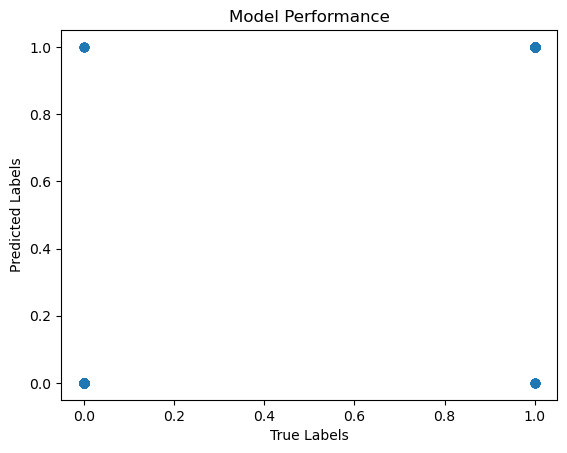

Model is correct!


In [459]:
# Calculate accuracy
accuracy = accuracy_score(y_test, ra_y_pred)
print(f'Accuracy: {accuracy:.3f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, ra_y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, ra_y_pred))

# Plot the data
plt.scatter(y_test, ra_y_pred)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('Model Performance')
plt.show()

# Check for overfitting, underfitting, or correctness
if accuracy > 0.9:
    print('Model is correct!')
elif accuracy < 0.6:
    print('Model is underfitting.')
else:
    print('Model is overfitting.')


In [458]:
import pickle
pickle.dump(ra_pipe,open('ra_pipe.pkl','wb'))